# Area of the Mandelbrot set


### 0 Init


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

### 1 Mandelbrot

In [3]:
def mandel_number(x, y, max_iter):
    ''' Returns the number of iterations needed for the Mandelbrot map to get out of scope '''
    a1, b1 = 0, 0
    for f in range(max_iter):
        if (a1 * a1 + b1 * b1) >= 4:
            return f
        a, b = a1 * a1 - b1 * b1 + x, 2 * a1 * b1 + y
        a1, b1 = a, b
    return max_iter

def colors(x, y, max_iter=100):
    ''' Calculates colors based on the number of iterations'''
    mandel_num = mandel_number(x, y, max_iter)
    if mandel_num < 10:
        g = mandel_num / 10
        return (0.2,  0, 0.9*g)  
    else:
        g = mandel_num / 100
        return (0.2, 0, 0.9*g)


def mandelbrot_image(s=500, xrange=(-2, 1.5), yrange=(-1.5, 1.5)):
    ''' Creates an image of the Mandelbrot set'''
    # Empty array voor x,y coordinated with colors
    img = np.zeros((s, s, 3))
    
    x_vals = np.linspace(xrange[0], xrange[1], s)
    y_vals = np.linspace(yrange[0], yrange[1], s)
    
    # Loop over each pixel and color it based on the Mandelbrot numbers
    for i, x in enumerate(x_vals):
        for j, y in enumerate(y_vals):
            img[j, i] = colors(x, y)  

    # Toon de afbeelding
    plt.imshow(img, extent=(xrange[0], xrange[1], yrange[0], yrange[1]))
    plt.title("Mandelbrot Set Visualization")
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.tight_layout()
    plt.show()



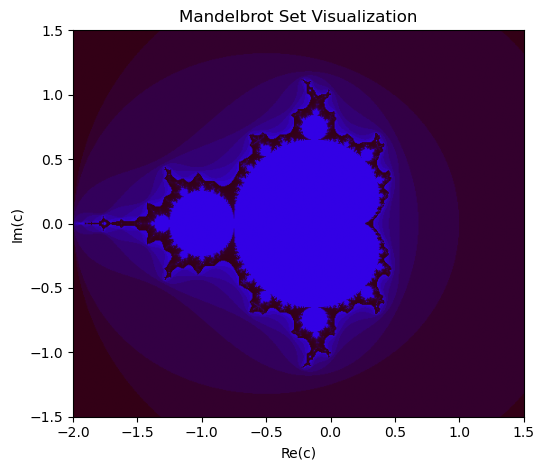

In [4]:
mandelbrot_image()

### 2 Monte Carlo

In [5]:
def in_mandelbrot_set(x,y, max_iter):
    ''' Determine if a complex number is part of the Mandelbrot set'''
    a1, b1 = 0, 0
    for f in range(max_iter):
        if (a1 * a1 + b1 * b1) >= 4:
            return 0
        a, b = a1 * a1 - b1 * b1 + x, 2 * a1 * b1 + y
        a1, b1 = a, b
    return 1

    
def monte_carlo(samples = 2000000, max_iter=100 ,xrange=(-2, 1.5), yrange=(-1.5, 1.5), plot = True ):
    ''' Approach the surface area of the Mandelbrot set by the Monte Carlo method'''
    x_min, x_max = xrange
    y_min, y_max = yrange
    region_area = (x_max - x_min) * (y_max - y_min)
    
    x_points = []
    y_points = []
    
    area_count = 0
    for i in range(samples):
        x = random.uniform(x_min,x_max)
        y = random.uniform(y_min,y_max)
        result = in_mandelbrot_set(x,y, max_iter)
        area_count += result
        if plot:
            if result == 1:
                x_points.append(x)
                y_points.append(y)

    # Estimate the area of the Mandelbrot set
    mandel_area = (area_count/samples) * region_area
    
    if plot: 
        # Plot the random points that are in the set
        plt.scatter(x_points, y_points, color="blue", s=0.1, label="Inside Mandelbrot")
        plt.xlabel("Re(c)")
        plt.ylabel("Im(c)")
        plt.title("Monte Carlo Sampling of the Mandelbrot Set")
        plt.xlim(-2, 1.5)
        plt.ylim(-1.5, 1.5)
        plt.axis("equal")
        plt.show()
    
    return mandel_area

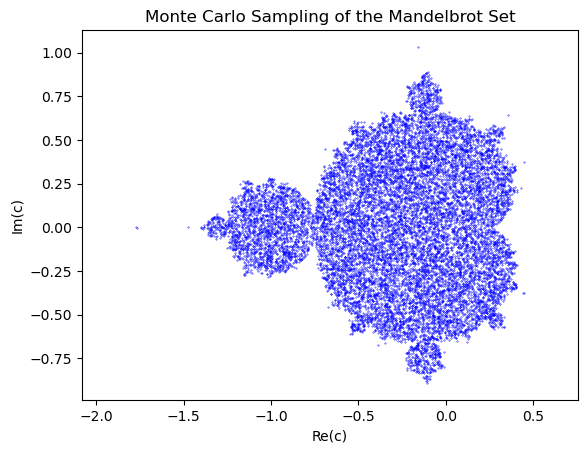

1.57017

In [6]:
monte_carlo(samples = 100000)

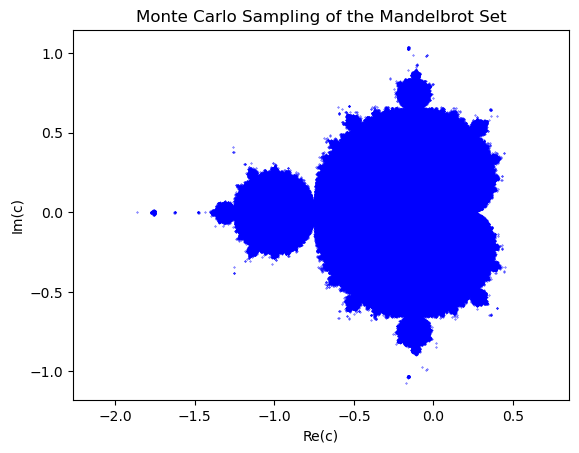

1.5471172499999999

In [7]:
monte_carlo()

#### 2.1 Approximate the true area

In [16]:
mc = [0,0,0,0,0]
for i in range(5):
    mc[i] = monte_carlo(samples = 2000000, max_iter = 1000, plot = False)

A_true = np.average(mc)
print(A_true)

1.5083628


Text(0.5, 1.0, 'Error in Monte Carlo estimate of Mandelbrot area')

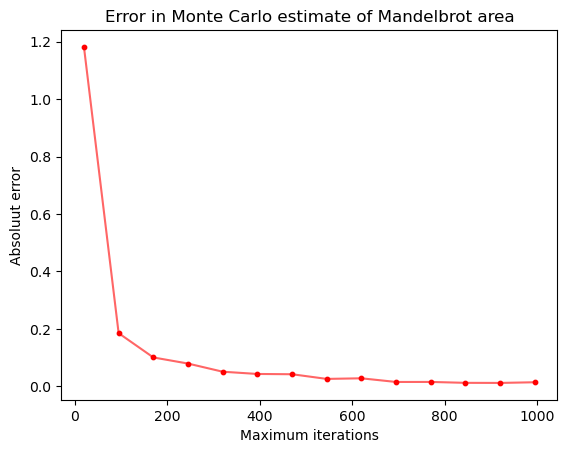

In [21]:
k = 5 # Iterations per j value
j_list = list(range(20, 1001, 75))

results_all = np.zeros((len(j_list),k))

for l,j in enumerate(j_list):
    result = np.zeros(k)
    for i in range(k):
        result[i] =  monte_carlo(samples= 2000000, max_iter = j, plot = False)
    results_all[l] = result


errors = np.zeros(len((j_list)))
for i,res in enumerate(results_all):
    error = 0
    for elem in res:
        error += np.abs(A_true - res)
    errors[i] = np.average(error)


plt.scatter(j_list, errors, s=10, color = 'red', label="Error")
plt.plot(j_list, errors, color = 'red',  alpha = 0.6 ,label="Error Trend")
plt.xlabel("Maximum iterations")
plt.ylabel("Absoluut error")
plt.title("Error in Monte Carlo estimate of Mandelbrot area")



In [24]:
np.save("Errors monte carlo, varying j, s=2mil", errors)

### 3 Monte Carlo variations

In [ ]:
def latin_hypercube(n, lower_bounds, upper_bounds):
    
    intervals = np.linspace(0, 1, n + 1)
    points = np.zeros((n, 2))
    rng = np.random.default_rng()

    for i in range(2):

        shuffled_intervals = intervals[:-1].copy()
        rng.shuffle(shuffled_intervals)
        points[:, i] = shuffled_intervals + rng.uniform(size=n) * (intervals[1:] - intervals[:-1])
    
    points = lower_bounds + points * (upper_bounds - lower_bounds)
    return points

def monte_carlo_lhs(samples = 100, max_iter = 100, xrange = (-2,1.5), yrange = (-1.5,1.5)):

    x_min, x_max = xrange
    y_min, y_max = yrange
    region_area = (x_max - x_min) * (y_max - y_min)

    lower_bounds = np.array([x_min, y_min])
    upper_bounds = np.array([x_max, y_max])
    samples_lhs = latin_hypercube(samples, lower_bounds, upper_bounds)

    area_count = 0
    for x, y in samples_lhs:
        if inset(x, y, max_iter):
            area_count += 1
    
    mandel_area = (area_count / samples) * region_area
    return mandel_area

lhs_estimate = monte_carlo_lhs(samples=1000)
print(lhs_estimate)


In [ ]:
mc = [0,0,0,0]
for i in range(4):
    mc[i] = monte_carlo_lhs(samples = 1000, max_iter = 500)

print(mc)
print(np.average(mc))

In [ ]:
xrange= [-2, 1.5]
yrange= [-1.5, 1.5]

n = 1000000

# make nXn grid
x_splits = np.linspace(xrange[0], xrange[1], n+1)
y_splits = np.linspace(yrange[0], yrange[1], n+1)

def mandel_test(x, y, max_iter):
    ''' Returns the number of iterations needed for the Mandelbrot map to get out of scope '''
    a1, b1 = 0, 0
    for f in range(max_iter):
        if (a1 * a1 + b1 * b1) >= 4:
            return 0
        a, b = a1 * a1 - b1 * b1 + x, 2 * a1 * b1 + y
        a1, b1 = a, b
    return 1



sqrt_n = int(np.sqrt(n))
# make loop with steps of 2
planes = []
surfaces = []
points = 0
for i in range(0,n,sqrt_n):
    for j in range(0,n,sqrt_n):
        # choose between 0 and sqrt_n
        x = random.randint(0,sqrt_n-1)
        y = random.randint(0,sqrt_n-1)
        x = x_splits[i+x]
        y = y_splits[j+y]
        points += mandel_test(x,y,100)
        surfaces.append([x_splits[i], x_splits[i+sqrt_n], y_splits[j], y_splits[j+sqrt_n]])
        planes.append([x,y])

#print(points)
print((points/n) * 3.5 * 3)

### 4 Monte Carlo Improvement

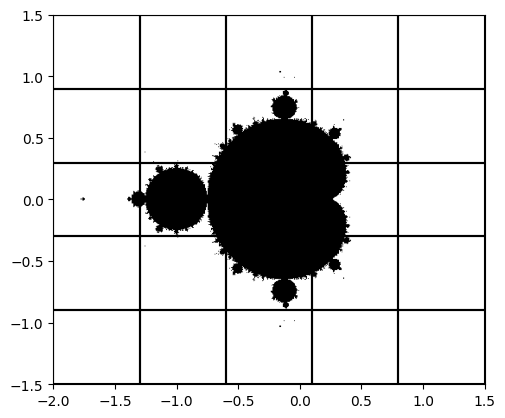

In [54]:
xrange= [-2, 1.5]
yrange= [-1.5,1.5]

def make_planes(xrange, yrange, amount_of_xsplits, amount_of_ysplits):
    ''' Devide the surface in smaller planes'''
    x_splits = np.linspace(xrange[0], xrange[1], amount_of_xsplits+1)
    y_splits = np.linspace(yrange[0], yrange[1], amount_of_ysplits+1)
    # make planes
    planes = []
    for i in range(amount_of_xsplits):
        for j in range(amount_of_ysplits):
            planes.append([x_splits[i], x_splits[i+1], y_splits[j], y_splits[j+1]])
    return planes

def plot_planes_and_mandelbrot(planes, xrange, yrange):
    ''' Plot the planes and mandelbrot function '''
    img = np.zeros((500, 500, 3))
    x_vals = np.linspace(xrange[0], xrange[1], 500)
    y_vals = np.linspace(yrange[0], yrange[1], 500)
    for i, x in enumerate(x_vals):
        for j, y in enumerate(y_vals):
            if mandel_number(x, y, 100) == 100:
                img[j, i] = (0, 0, 0)
            else:
                img[j, i] = (1, 1, 1) 
    plt.imshow(img, extent=(xrange[0], xrange[1], yrange[0], yrange[1]))
    for plane in planes:
        plt.plot([plane[0], plane[1], plane[1], plane[0], plane[0]], [plane[2], plane[2], plane[3], plane[3], plane[2]], color = 'black')
    plt.show()

planes = make_planes(xrange, yrange, 5, 5)
plot_planes_and_mandelbrot(planes, xrange, yrange)

In [97]:

def monte_carlo_p(x,y, max_iter):
    a1, b1 = 0, 0
    for f in range(max_iter):
        a1s = a1 * a1
        b1s = b1 * b1
        if (a1s + b1s) >= 4:
            return 0
        a, b = a1s - b1s + x, 2 * a1 * b1 + y
        a1, b1 = a, b
    return 1

def monte_carlo_plane(plane, n, max_iter = 100):
    ''' Monte Carlo method for the Mandelbrot set with planes'''
    samples = np.random.uniform((plane[0], plane[2]), (plane[1], plane[3]), (n, 2))
    total_area = np.sum([monte_carlo_p(x, y, max_iter) for x, y in samples]) / n
    return total_area

def monte_carlo_planes(planes, n, max_iter = 100):
    amount_of_planes = len(planes)
    amount_of_n_per_plane = int(n / amount_of_planes)
    half = int(amount_of_n_per_plane / 2)
    result_per_plane = np.zeros(amount_of_planes)
    for i, plane in enumerate(planes):
        result_per_plane[i] = monte_carlo_plane(plane, half, max_iter)
    amount_of_zeros = np.count_nonzero(result_per_plane == 0)
    amount_of_ones = np.count_nonzero(result_per_plane == 1)
    iterations_do = (((amount_of_zeros+amount_of_ones) * half) / (amount_of_planes - amount_of_zeros - amount_of_ones)) + half
    second_half = np.zeros(amount_of_planes)
    for i in range(result_per_plane.size):
        if result_per_plane[i] != 0 or result_per_plane[i] != 1:
            second_half[i] = monte_carlo_plane(planes[i], int(iterations_do), max_iter)
        else:
            second_half[i] = result_per_plane[i]
    total_size = 0
    size = (planes[0][1] - planes[0][0]) * (planes[0][3] - planes[0][2])
    for i in range(amount_of_planes):
        percentage = (result_per_plane[i] * half + second_half[i] * int(iterations_do)) / (half + int(iterations_do))
        total_size += percentage * size
    return total_size



In [106]:
list_of_j = [10**i for i in range(2, 6)]
import time
restults = []
for j in list_of_j:
    start = time.time()
    planes = make_planes(xrange, yrange, 5, 5)
    restults.append(monte_carlo_planes(planes, 10000, max_iter=j))
    stop = time.time()
    print(f"Time for j={j}: {stop-start}")
    print(restults)

Time for j=100: 0.1620042324066162
[1.5498278145695366]
Time for j=1000: 1.1546478271484375
[1.5498278145695366, 1.5102]
Time for j=10000: 11.674817323684692
[1.5498278145695366, 1.5102, 1.499205298013245]
Time for j=100000: 116.93061661720276
[1.5498278145695366, 1.5102, 1.499205298013245, 1.5069933774834436]


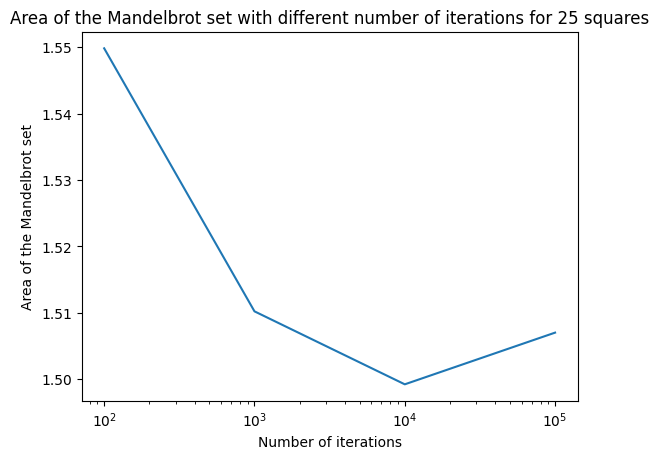

In [107]:
# make plot of the results
plt.plot(list_of_j, restults)
plt.xscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Area of the Mandelbrot set')
plt.title('Area of the Mandelbrot set with different number of iterations for 25 squares')
plt.show()



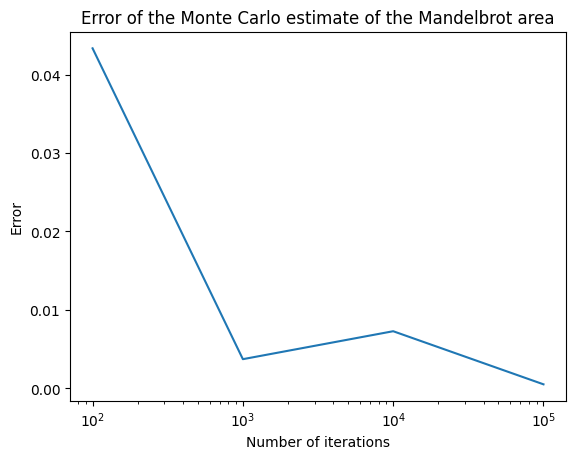

In [108]:
# make error plot
A_true = 1.506484
errors = []
for result in restults:
    errors.append(np.abs(A_true - result))
plt.plot(list_of_j, errors)
plt.xscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Error of the Monte Carlo estimate of the Mandelbrot area')
plt.show()

In [124]:
import numpy as np

def monte_carlo_p_numpy(xs, ys, max_iter):
    """
    Vectorized Monte Carlo Mandelbrot calculation.
    
    Parameters:
        xs: np.ndarray - Array of x-coordinates.
        ys: np.ndarray - Array of y-coordinates.
        max_iter: int - Maximum number of iterations.
    
    Returns:
        np.ndarray - Array of 0s and 1s indicating if a point is in the Mandelbrot set.
    """
    # Startwaarden
    a = np.zeros_like(xs)
    b = np.zeros_like(ys)
    mask = np.ones_like(xs, dtype=bool)  # Mask for active points
    result = np.zeros_like(xs, dtype=int)  # Initialize all points as outside

    for _ in range(max_iter):
        a_squared = a ** 2
        b_squared = b ** 2

        # Magnitude check: Points that escape
        magnitude = a_squared + b_squared
        diverge = magnitude >= 4
        result[diverge & mask] = 0  # Diverging points are outside the set
        mask = mask & ~diverge  # Update mask for points still in the set

        if not mask.any():  # Stop if all points have diverged
            break

        # Update active points
        a_new = a_squared - b_squared + xs
        b_new = 2 * a * b + ys
        a[mask] = a_new[mask]
        b[mask] = b_new[mask]

    result[mask] = 1 
    return result

def monte_carlo_plane_numpy(plane, n, max_iter=100):
    xs, ys = np.random.uniform(plane[0], plane[1], n), np.random.uniform(plane[2], plane[3], n)
    membership = monte_carlo_p_numpy(xs, ys, max_iter)
    return np.mean(membership)

def monte_carlo_planes(planes, n, max_iter = 100):
    amount_of_planes = len(planes)
    amount_of_n_per_plane = int(n / amount_of_planes)
    half = int(amount_of_n_per_plane / 2)
    result_per_plane = np.zeros(amount_of_planes)
    for i, plane in enumerate(planes):
        result_per_plane[i] = monte_carlo_plane_numpy(plane, half, max_iter)
    amount_of_zeros = np.count_nonzero(result_per_plane == 0)
    amount_of_ones = np.count_nonzero(result_per_plane == 1)
    iterations_do = (((amount_of_zeros+amount_of_ones) * half) / (amount_of_planes - amount_of_zeros - amount_of_ones)) + half
    second_half = np.zeros(amount_of_planes)
    for i in range(result_per_plane.size):
        if result_per_plane[i] != 0 or result_per_plane[i] != 1:
            second_half[i] = monte_carlo_plane_numpy(planes[i], int(iterations_do), max_iter)
        else:
            second_half[i] = result_per_plane[i]
    total_size = 0
    size = (planes[0][1] - planes[0][0]) * (planes[0][3] - planes[0][2])
    for i in range(amount_of_planes):
        percentage = (result_per_plane[i] * half + second_half[i] * int(iterations_do)) / (half + int(iterations_do))
        total_size += percentage * size
    return total_size



In [ ]:
list_of_j = [10**i for i in range(2, 6)]
import time
restults = []
for j in list_of_j:
    start = time.time()
    planes = make_planes(xrange, yrange, 5, 5)
    restults.append(monte_carlo_planes(planes, 100000, max_iter=j))
    stop = time.time()
    print(f"Time for j={j}: {stop-start}")
    print(restults)

Time for j=100: 0.04055142402648926
[1.5526092715231787]
Time for j=1000: 0.3192555904388428
[1.5526092715231787, 1.5103311258278147]
Time for j=10000: 3.1169846057891846
[1.5526092715231787, 1.5103311258278147, 1.4847417218543044]


KeyboardInterrupt: 